  <h2 style="text-align: center;">Data601</h2>
  <h3 style="text-align: center">Exploratory data analysis on Baltimore 911 call data with Baltimore crime data</h3>

<h4>Data Source</h4>
<ul>
    <li>
        <h5>Dataset 1: Baltimore 911 Call Data</h5>
        <p>This dataset represents the Police Emergency and Non-Emergency calls to 911, year 2021.The data is updated on Friday evening on a weekly basis.</p>
        <h5>Source Link:</h5>
        <a href="https://data.baltimorecity.gov/datasets/911-calls-for-service-2021-/explore">Baltimore 911 Call Data</a>
        <p>https://data.baltimorecity.gov/datasets/baltimore::911-calls-for-service-2021-/about</p>
    </li>
    <li>
        <h5>Dataset 2: Baltimore Crime Data</h5>
        <p>This dataset represents the location and characteristics of major (Part 1) crime against persons such as homicide, shooting, robbery, aggravated assault etc. occurring within the City of Baltimore. The data is updated on Friday evening on a weekly basis.</p>
        <h5>Source Link:</h5>
        <a href="https://data.baltimorecity.gov/datasets/baltimore::part1-crime-data/about">Baltimore Crime Data</a>
        <p>https://data.baltimorecity.gov/datasets/baltimore::part1-crime-data/about</p>
    </li>
</ul>

<h3 style="text-align: center">Data Description</h3>

<h4>Dataframe: year 2021 911 Baltimore Call Data</h4>

| Column | Datatype | Description |
|--|--|--|
| callDateTime | Date or Time | Date and time of the call or incident |
    | priority | Text | Urgency of the request. <br><b>Example:</b> High, Low, Medium, Emergency, Non- Emergency |
| district | Text | District from which call is initiated |
| description | Text | What is the complaint/Request is about |
| callNumber | Text | NA |
|incidentLocation| Text | Location of the Incident |
|location| Text | incident location |
|Neighborhood| Text | Place or locality Where incident happened |
|PoliceDistrict| Text | District where incident happened |
|PolicePost| Number |NA |
|CouncilDistrict| Number |NA |
|SheriffDistricts| Text |NA |
|Community_Statistical_Areas| Text | clusters of neighborhoods developed by the City's Planning Department based on recognizable city neighborhoods. |
|Census_Tracts| Text | A Census Tract is a relatively small geographic area—a subdivision of a county—that is established by the Census Bureau for collecting census data.|
|VRIZones| Text |NA |
|ZIPCode| Number | Zipcode of the incident or call initiated |

<h4>Baltimore Crime Data</h4>

| Column | Datatype | Description | 
|--|--|--|
| CrimeDateTime | Date and Time | Date of the incident and time of the incident |
| CrimeCode | Text | Each crime is given a Crime Code |
| Location | Text |Address where incident occurred |
    | Description | Text |Name of the incident <br><b>example:</b> burglary, Murder, Assault |
    | Inside_Outside | Text | Whether incident happened indoor or outdoor. <br><b>inside:</b> indoor, <b>outside:</b> outdoor |
| Weapon | Text | Weapon used while committing crime |
| Post | Text | last 3 digits of postal code (I Guess) |
| District | Text | District where incident happened |
| Neighborhood | Text | Place or locality Where incident happened |
| Latitude | Number | Latitude of the crime incident |
|Longitude|Number| Logitude of the Crime incident|
|GeoLocation|Text| GeoLocation of the crime incident(combination of latitude and logitude) |
| Premise | Text | premises of the incident example: Street, House |
|VRIName|Text| NA |
|Total_Incidents|Number| Total number of incidents |



<h4>Python Kernel Version</h4>

In [1]:
!Python --version
!pip install jellyfish

Python 3.9.7


<h5>Imports</h5>

In [2]:
import pandas as pd
import time
from spellchecker import SpellChecker
import re
import jellyfish
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm

<h5>Loading Data</h5>

In [3]:
# measuring start time of the file execution.
start_time = time.time()
# Reading 911 call data using pandas
raw_911_df = pd.read_csv(r"911_Calls_for_Service_2021.csv");
# Reading baltimore crime data using pandas
raw_crime_df = pd.read_csv(r"Part1_Crime_data.csv")

<h4>Initial Analysis</h4>

In [4]:
print("911 call dataframe shape:",raw_911_df.shape)
print("Crime dataframe shape:",raw_crime_df.shape)

911 call dataframe shape: (1690944, 20)
Crime dataframe shape: (520944, 19)


<h5>Observation</h5>
<li>Both the dataframes are rectangular in shape</li>
<li>911 call data is over 1.6 million rows just for an year(2021) data</li>
<li>Crime data is over 520k rows from 1960 to 2022 May</li>

<h5>Data Extraction</h5>

In [5]:
raw_911_df = raw_911_df[['callDateTime', 'priority', 'PoliceDistrict', 'description', 'Neighborhood', 'ZIPCode']]
raw_crime_df = raw_crime_df[['CrimeDateTime','CrimeCode','Location','Description','Inside_Outside','Weapon','Post','District','Neighborhood','Premise']]

<h3 style="text-align:center">Common methods used for sanity checks</h3>

In [6]:
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("\n==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

<h3 style="text-align:center">Sanity Check Before Cleaning</h3>

In [7]:
print(raw_911_df.info())
print(raw_crime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690944 entries, 0 to 1690943
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   callDateTime    object 
 1   priority        object 
 2   PoliceDistrict  object 
 3   description     object 
 4   Neighborhood    object 
 5   ZIPCode         float64
dtypes: float64(1), object(5)
memory usage: 77.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520944 entries, 0 to 520943
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CrimeDateTime   520944 non-null  object
 1   CrimeCode       520944 non-null  object
 2   Location        518371 non-null  object
 3   Description     520944 non-null  object
 4   Inside_Outside  451335 non-null  object
 5   Weapon          109471 non-null  object
 6   Post            519190 non-null  object
 7   District        519190 non-null  object
 8   Neighborhood    519158 non-null 

<h5>Observation:</h5>
<li>CallDatetTime in raw_911_df is in object format instead of datetime</li>
<li>CrimeDateTime in raw_crime_df id in object format instead of datetime</li>

In [8]:
raw_911_df.describe(include='all')

,callDateTime,priority,PoliceDistrict,description,Neighborhood,ZIPCode
count,1690944,1690943,1663034,1690944,1662934,1.685038e+06
unique,473440,6,9,2600,278,NaN
top,2021/01/25 08:22:00+00,Non-Emergency,Northwestern,Business Check,Downtown,NaN
freq,31,1080133,217265,453326,53947,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.091935e+04
std,NaN,NaN,NaN,NaN,NaN,2.495284e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.121100e+04
50%,NaN,NaN,NaN,NaN,NaN,2.121700e+04
75%,NaN,NaN,NaN,NaN,NaN,2.122400e+04


In [9]:
raw_crime_df.describe(include='all')

,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Premise
count,520944,520944,518371,520944,451335,109471,519190,519190,519158,450999
unique,342105,85,24111,14,4,21,127,9,278,164
top,2016/06/05 02:38:00+00,4E,1500 RUSSELL ST,LARCENY,I,FIREARM,114,NORTHEAST,DOWNTOWN,STREET
freq,129,93577,1114,115022,217501,46338,9826,77981,18122,160892


In [10]:
raw_911_df.isnull().sum()

callDateTime          0
priority              1
PoliceDistrict    27910
description           0
Neighborhood      28010
ZIPCode            5906
dtype: int64

<h5>Observation 911 Call Data Null Values:</h5>
<li>No Null values in CallDateTime, Description</li>
<li>27K Null values in police district</li>
<li>28K Null values in Neighbohood</li>
<li>5906 Null values in Zipcode</li>

In [11]:
raw_crime_df.isnull().sum()

CrimeDateTime          0
CrimeCode              0
Location            2573
Description            0
Inside_Outside     69609
Weapon            411473
Post                1754
District            1754
Neighborhood        1786
Premise            69945
dtype: int64

<h5>Observation Crime Data null values:</h5>
<li>No Null values in CrimeDateTime, Crime code, Description</li>
<li>Most of the values in weapon column is Null</li>
<li>Post, District and Neighborhood has almost equal null values </li>
<li>Inside_Outside column has almost 70k null values</li>

<h4>Checking Unique Values in 911 call data</h4>

In [12]:
uniq_per_col(raw_911_df, 10)


====  callDateTime has 473440 unique entries ====
2021/01/25 08:22:00+00    31
2021/01/25 03:22:00+00    29
2021/02/09 16:36:00+00    26
2021/01/23 02:18:00+00    25
2021/02/25 17:47:00+00    25
2021/01/23 01:57:00+00    25
2021/01/25 04:44:00+00    24
2021/01/14 17:55:00+00    24
2021/02/09 16:34:59+00    24
2021/03/06 16:57:59+00    23
Name: callDateTime, dtype: int64

====  priority has 6 unique entries ====
Non-Emergency     1080133
Medium             271998
Low                255565
High                82742
Emergency             266
Out of Service        239
Name: priority, dtype: int64

====  PoliceDistrict has 9 unique entries ====
Northwestern    217265
Southeastern    202763
Southern        202009
Eastern         184395
Northern        180963
Western         179292
Central         170350
Southwestern    166328
Northeastern    159669
Name: PoliceDistrict, dtype: int64

====  description has 2600 unique entries ====
Business Check     453326
DIRECTED PATROL    304091
DISORDERL

<h5>Observation On 911 Call Data Unique Values:</h5>
<li>priority, PoliceDistrict looks good  with no </li>
<li>description has 2600 values, which is very high.</li>
<li>Zipcode should be in string format but it is number format</li>

<h4>Checking Unique Values in crime data:</h4>

In [13]:
uniq_per_col(raw_crime_df, 20)


====  CrimeDateTime has 342105 unique entries ====
2016/06/05 02:38:00+00    129
2018/12/20 04:00:00+00     77
2013/12/25 02:00:00+00     59
2015/04/27 15:30:00+00     44
2011/06/16 18:00:00+00     43
2020/04/11 13:00:00+00     39
2017/02/18 00:00:00+00     34
2015/04/27 17:00:00+00     31
2015/04/27 16:00:00+00     30
2020/03/17 18:27:00+00     25
2017/02/04 00:00:00+00     24
2017/03/22 19:50:00+00     24
2017/10/29 18:00:00+00     24
2017/02/14 00:00:00+00     23
2015/12/15 21:35:00+00     23
2021/03/12 18:00:00+00     23
2012/11/01 18:45:00+00     23
2017/03/08 00:00:00+00     21
2019/09/13 22:00:00+00     21
2015/11/28 19:00:00+00     20
Name: CrimeDateTime, dtype: int64

====  CrimeCode has 85 unique entries ====
4E     93577
6D     69126
5A     44274
7A     40742
6J     28026
6G     27123
6E     24399
6C     23516
4C     22696
4B     15037
5D     14973
3AF    14910
4A     13568
3B     10760
4D      7230
5B      6616
9S      5588
6F      5455
5C      4917
6B      4106
Name: Crim

<h5>Observation unique Values Crime Data:</h5>
<li>Date,CrimeCode,Location,Description looks good</li>
<li>Inside Outside column has "I", "O", Inside and Outside</li>
<li>Weapon Column has Firearm with different words like AUTOMATIC_OTHER_FIREARM etc. Same With Knife and KNIFE_CUTTING_INSTRUMENT</li>

<h5>Futher Analysis on Suspicious Columns</h5>

In [14]:
raw_crime_df.Premise.unique()

array([nan, 'DWELLING', 'STREET', 'COMMON BUSINESS', 'VACANT DWELLING',
       'HOSPITAL', 'PUBLIC AREA', 'PARKING LOT', 'OFFICE BUILDING',
       'RACE TRACK', 'CONVENIENCE STORE', 'OTHER/RESIDENTIAL',
       'RESTAURANT', 'HOTEL/MOTEL', 'PUBLIC BUILDING', 'GAS STATION',
       'TAVERN/NIGHT CLUB', 'BANK/FINANCIAL INST', 'SCHOOL',
       'SHED/GARAGE', 'DRUG STORE / MED  BL', 'PARK', 'SPECIALTY STORE',
       'RELIGIOUS  INSTITUTI', 'SHOPPING MALLS/CNTR',
       'GROCERY/CONFECTION', 'UNKNOWN', 'CONSTRUCTION SITE',
       'BUS/RAILROAD STATION', 'CAR LOT-NEW/USED', 'BOAT YARD', 'STADIUM',
       'OTHER - OUTSIDE', 'VACANT LOT/WOODS', 'ALLEY', 'VACANT BUILDING',
       'MINI STORAGE LOCKERS', 'LIQUOR STORE', 'PUBLIC HOUSING',
       'PENITENTIARY/JAIL', 'VEHICLE', 'PUBLIC SCHOOL', 'WAREHOUSE',
       'APT/CONDO - OCCUPIED', 'ATM MACHINES', 'PARKING LOT-OUTSIDE',
       'ROW/TOWNHOUSE-OCC', 'CHURCH', 'BUS/AUTO', 'COURT HOUSE',
       'OTHER - INSIDE', 'BUS. PARK LOT-OUTSID', 'SCHOOL PLA

<h3 style="text-align:center">Data Cleaning</h3>

<h5>Data cleaning and sanity checks 911 call data</h5>

In [15]:
# Remove Extraspaces between words in raw_911_df
raw_911_df['description'] = raw_911_df['description'].str.strip().str.replace('  ', ' ')
# uniq_per_col(raw_911_df,3000)
raw_911_df['description'].unique().tolist()

['DISCHRG FIREARM',
 'SUPV COMPLAINT',
 '911/NO VOICE',
 'ShotSpot Alert',
 'DISORDERLY',
 'BURGLARY',
 'OTHER',
 'HANDGUN VIOLATIO',
 'LOUD MUSIC',
 'WANTED ON WARR',
 'Business Check',
 'SUSPICIOUS PERS',
 'ARMED PERSON',
 'DIRECTED PATROL',
 'EXPART/PROT/PEAC',
 'COMMON ASSAULT',
 'SILENT ALARM',
 'Repairs/Service',
 'INTOXICATED PERS',
 'SICK CASE',
 'Foot Patrol',
 'FAMILY DISTURB',
 'BEHAVIOR CRISIS',
 'AUTO ACC/INJURY',
 'AUTO ACCIDENT',
 'DWI',
 'AGGRAV ASSAULT',
 'DISABLE CAR',
 'CUTTING',
 'RA POLICE',
 'Personal Relief',
 'INVESTIGATE',
 'NARCOTICS',
 'HIT AND RUN',
 'DISABLED VEH',
 'TOWED VEHICLE',
 'FIRE',
 'SEE TEXT',
 'CHECK WELL BEING',
 'Traffic Stop',
 'JUV DISTURBANCE',
 'PRKG COMPLAINT',
 'SIGNAL OUT',
 'AUTO THEFT',
 'ROBBERY ARMED',
 'Private Tow',
 'BAIL OUT',
 'RECOVER PROPERTY',
 'OVERDOSE',
 'MISSING PERSON',
 'FOLLOW UP',
 'Transport',
 'LARCENY',
 'UNAUTHORIZED USE',
 'INVESTIGATE AUTO',
 'Lab Request',
 'NONBREATHING / A',
 'PICKUP ORDERS',
 'LYING IN STRE

In [16]:
# Sanity check to typos in description column
raw_911_df[raw_911_df.description.str.startswith('AT')].description.unique()

array(['ATTEMPT TO LOCAT', 'ATTEMPTED', 'ATTEMPT TO LOC', 'ATTEMPT',
       'ATTEMPTTOLOCATE', 'ATTEMPTING', 'ATT TO LOCATE',
       'ATTEMPT STABBING', 'ATM MACHINE', 'ATTM TO LOCATE', 'ATEEMPTS',
       'ATTEMPT B&E', 'ATTEMPT ARSAN', 'ATTPT TO LOCATE',
       'ATTMPT TO LOCATE', 'ATTEMPT TO OTHER', 'ATT LRCNY F/AUT',
       'ATTEMT TO NOTIFY', 'ATMPT TO LOCATE', 'ATEMPT TO LOCATE',
       'ATT TO LOC', 'ATTEMPT LOCATE', 'ATMPT BURGLARY',
       'ATTEMP TO LOCATE', 'ATEMP ROBERY', 'ATTEMPT BREAK IN',
       'ATT SUICIDE-VIOL', 'ATT TOLOCATE', 'ATT TO LOC.', 'ATT LOC',
       'ATTP TO LOC', 'ATL', 'ATTEMPTED THEFT', 'ATTEMPT TO NOTIF',
       'ATT SUICIDE-WEAP', 'ATTEMPTTONOTIFY', 'ATTEPMT TO LOC',
       'ATTEMPTED BURG', 'ATTEMPT 2 LOCATE', 'ATTEMPT ARM ROB',
       'ATTP TO NTFY', 'ATTEMPT BURGLARY', 'ATTMPT LARCENY',
       'ATTEM TO LOCATE', 'ATT ROBBRY ARMED', 'ATTMTAUTO THEFT',
       'ATTEMPT TO CONTA', 'ATT. TO NOTIFY', 'ATT MAKE CONTACT',
       'ATTEMPYRF', 'ATTMPT BURGLARY

In [17]:
# Method list all words in the Description column
def list_spelling_mistakes(lst):
    unique_words = set()
    for x in lst:
        for y in x.split():
            unique_words.add(y)
    return [x for x in sorted(unique_words) if x.isalpha()]

In [18]:
# Displaying sorted list of words in description column in dictionary order
list_spelling_mistakes(raw_911_df['description'].unique().tolist())

['A',
 'ABANDON',
 'ABANDONED',
 'ABDUCTION',
 'ABUSE',
 'ACCIDENT',
 'ACCIDENTJ',
 'ACIDENT',
 'ACT',
 'ACTIV',
 'ADDRESS',
 'ADIVSE',
 'ADMIN',
 'ADTER',
 'ADU',
 'ADULT',
 'ADVI',
 'ADVICE',
 'ADVIS',
 'ADVISD',
 'ADVISE',
 'ADVISED',
 'ADVISEMENT',
 'AFTER',
 'AFTR',
 'AGAINST',
 'AGGR',
 'AGGRAV',
 'AGGRESIVE',
 'AGGRESS',
 'AGGRESSIVE',
 'AGGRV',
 'AGGV',
 'AGNST',
 'AIR',
 'ALARM',
 'ALERT',
 'ALL',
 'ALLEY',
 'ALLOUT',
 'ALOPED',
 'ALOPEMENT',
 'ALOPEMNET',
 'ALOPMENT',
 'AMBO',
 'AMIN',
 'AMPLIFIER',
 'AMTRAK',
 'AND',
 'ANDIES',
 'ANDRUN',
 'ANIM',
 'ANIMAL',
 'ANIMLAS',
 'APREHENS',
 'APT',
 'AREA',
 'ARM',
 'ARMD',
 'ARMED',
 'ARSAN',
 'ARSON',
 'ASK',
 'ASS',
 'ASSAULT',
 'ASSESS',
 'ASSI',
 'ASSISIT',
 'ASSIST',
 'ASSISTAN',
 'ASSISTANC',
 'ASSISTANCE',
 'ASSISTANT',
 'ASSISTTHE',
 'ASSIT',
 'ASSLT',
 'ASSOST',
 'ASSSIST',
 'ASST',
 'ASSUALT',
 'AST',
 'AT',
 'ATEEMPT',
 'ATEEMPTS',
 'ATEMP',
 'ATEMPT',
 'ATL',
 'ATM',
 'ATMPT',
 'ATT',
 'ATTACK',
 'ATTEM',
 'ATTEMP',
 'A

In [19]:
# Checking the if the Typos can be corrected with SpellChecker Module
spell = SpellChecker()
spelling_list=[]
for word in spell.unknown(list_spelling_mistakes(raw_911_df['description'].unique().tolist())):
    spelling_list.append(spell.correction(word))

In [20]:
# Listing Corrected spelling in dictionary order
sorted(spelling_list)

['accident',
 'accident',
 'active',
 'add',
 'address',
 'adi',
 'admit',
 'advise',
 'advise',
 'advise',
 'after',
 'after',
 'agg',
 'aggro',
 'aggro',
 'aggro',
 'aim',
 'al',
 'all',
 'all',
 'allotment',
 'animals',
 'aprehend',
 'army',
 'arson',
 'ass',
 'ass',
 'asset',
 'assist',
 'assist',
 'assist',
 'assist',
 'assist',
 'assistant',
 'assistant',
 'assistive',
 'atom',
 'atop',
 'attempt',
 'attempt',
 'attempt',
 'attempt',
 'attempt',
 'attempt',
 'attempt',
 'attempts',
 'attempttolocate',
 'attempttonotify',
 'attempyrf',
 'atter',
 'attmtauto',
 'author',
 'away',
 'awol',
 'awol',
 'bailbonds',
 'baking',
 'ball',
 'ball',
 'baltimore',
 'bark',
 'be',
 'be',
 'beg',
 'behave',
 'bein',
 'bein',
 'bein',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'being',
 'belonging',
 'belonging',
 'belonging',
 'belonging',
 'belonging',
 'belonging',
 'belongings',
 'belongings',
 

<h5>Observation</h5>
<li>Too many spelling mistakes</li>
<li>SpellChecker is not Accurate enough</li>
<li>As this is an emergency service and data has to be entered quick caused too many typos or spelling errors</li>

In [21]:
# Used to Soundex Module to identify words based on sounds and group them together
key_dict={}
for x in list_spelling_mistakes(raw_911_df['description'].unique().tolist()):
    key=jellyfish.soundex(x)
    if key not in key_dict.keys():
        key_dict[key]=[x]
    else:
        key_dict.get(key).append(x)

In [22]:
print(len(key_dict.keys()))
key_dict

712


{'A000': ['A', 'AW', 'AWAY'],
 'A153': ['ABANDON', 'ABANDONED'],
 'A132': ['ABDUCTION'],
 'A120': ['ABUSE'],
 'A235': ['ACCIDENT', 'ACCIDENTJ', 'ACIDENT'],
 'A230': ['ACT', 'ASSIT', 'ASST', 'AST'],
 'A231': ['ACTIV'],
 'A362': ['ADDRESS', 'AUTHORIZED'],
 'A312': ['ADIVSE',
  'ADVICE',
  'ADVIS',
  'ADVISD',
  'ADVISE',
  'ADVISED',
  'ADVISEMENT'],
 'A355': ['ADMIN'],
 'A360': ['ADTER'],
 'A300': ['ADU', 'AT', 'ATT', 'AUTO'],
 'A343': ['ADULT'],
 'A310': ['ADVI', 'ATTP'],
 'A136': ['AFTER', 'AFTR'],
 'A252': ['AGAINST', 'AGNST'],
 'A260': ['AGGR'],
 'A261': ['AGGRAV', 'AGGRV'],
 'A262': ['AGGRESIVE', 'AGGRESS', 'AGGRESSIVE'],
 'A210': ['AGGV'],
 'A600': ['AIR', 'AREA'],
 'A465': ['ALARM'],
 'A463': ['ALERT', 'Alert'],
 'A400': ['ALL', 'ALLEY', 'AWAL', 'AWHOL', 'AWOL', 'AWOLL'],
 'A430': ['ALLOUT'],
 'A413': ['ALOPED'],
 'A415': ['ALOPEMENT', 'ALOPEMNET', 'ALOPMENT'],
 'A510': ['AMBO'],
 'A550': ['AMIN', 'ANIM'],
 'A514': ['AMPLIFIER'],
 'A536': ['AMTRAK', 'ANDRUN'],
 'A530': ['AND'],
 

<h5>Observation</h5>
<li>Soundex is able to group words with similar soundings together with better accuracy than SpellChecker</li>
<li>But the spelling correction cannot be done using soundex </li>

In [23]:
raw_911_df.Neighborhood.unique()

array(['Midtown-Edmondson', 'Harlem Park', 'Loch Raven', 'Charles North',
       'New Northwood', 'Rosemont', 'Richnor Springs',
       'Washington Village/Pigtown', 'Patterson Park Neighborhood',
       'Brooklyn', 'Orangeville', 'Allendale', 'West Arlington',
       'Armistead Gardens', 'Ellwood Park/Monument', 'Carrollton Ridge',
       'Harwood', 'Penrose/Fayette Street Outreach', 'Canton',
       'Cherry Hill', 'Bayview', 'Glenham-Belhar', 'Millhill',
       'Parkview/Woodbrook', 'Belair-Parkside', 'Otterbein', 'Edgewood',
       'Barclay', 'Greenmount West', 'Upton', 'Franklin Square',
       'Belair-Edison', 'Arcadia', 'Hampden', 'Sandtown-Winchester',
       'Reservoir Hill', 'Coppin Heights/Ash-Co-East', 'Federal Hill',
       'Cheswolde', 'Mondawmin', 'Johnston Square', 'Hawkins Point',
       'Downtown', 'Oliver', 'Lauraville', 'East Baltimore Midway',
       'Waverly', 'Penn-Fallsway', 'Arlington', 'Saint Helena',
       'Parklane', 'Waltherson', 'Winston-Govans', 'Lakeland

<h5>Data Clean and Sanity Check</h5>

In [24]:
raw_911_df['Neighborhood'] = raw_911_df['Neighborhood'].str.strip().str.replace('  ', ' ');
raw_911_df.isna().sum()

callDateTime          0
priority              1
PoliceDistrict    27910
description           0
Neighborhood      28010
ZIPCode            5906
dtype: int64

In [25]:
raw_911_df.fillna('Unknown', inplace=True)
raw_911_df.isna().sum()

callDateTime      0
priority          0
PoliceDistrict    0
description       0
Neighborhood      0
ZIPCode           0
dtype: int64

In [26]:

raw_911_df['ZIPCode'] = raw_911_df['ZIPCode'].astype(str);
# raw_911_df['ZIPCode1'] = raw_911_df['ZIPCode'].apply(lambda x: 'Unknown' if x == '0.0')
raw_911_df['ZIPCode'] = raw_911_df['ZIPCode'].apply(lambda x: 'Unknown' if x == '0.0' else x.split('.')[0])

In [27]:
raw_911_df["callDateTime"] = pd.to_datetime(raw_911_df['callDateTime'], format='%Y/%m/%d %H:%M:%S', errors = 'coerce', utc=True)

In [28]:
raw_911_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690944 entries, 0 to 1690943
Data columns (total 6 columns):
 #   Column          Dtype              
---  ------          -----              
 0   callDateTime    datetime64[ns, UTC]
 1   priority        object             
 2   PoliceDistrict  object             
 3   description     object             
 4   Neighborhood    object             
 5   ZIPCode         object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 77.4+ MB


<h5>Data Cleaning and Sanity Checks Crime_Data</h5>


In [29]:
raw_crime_df['Inside_Outside'] = raw_crime_df['Inside_Outside'].replace(['I','O'],['Inside','Outside'])

In [30]:
raw_crime_df.Inside_Outside.unique()
raw_crime_df['Weapon'].unique()

array([nan, 'PERSONAL_WEAPONS', 'FIREARM', 'OTHER_FIREARM',
       'KNIFE_CUTTING_INSTRUMENT', 'OTHER', 'MOTOR_VEHICLE_VESSEL',
       'HANDGUN', 'UNKNOWN', 'AUTOMATIC_OTHER_FIREARM',
       'AUTOMATIC_HANDGUN', 'RIFLE', 'BLUNT_OBJECT', 'POISON',
       'ASPHYXIATION', 'AUTOMATIC_FIREARM', 'SHOTGUN', 'KNIFE',
       'FIRE_INCENDIARY_DEVICE', 'FIRE', 'HANDS',
       'DRUGS_NARCOTICS_SLEEPING_PILLS'], dtype=object)

In [31]:
raw_crime_df['Weapon'] = raw_crime_df['Weapon'].replace(['HANDGUN', 'OTHER_FIREARM', 'AUTOMATIC_OTHER_FIREARM', 'AUTOMATIC_HANDGUN', 'RIFLE', 'AUTOMATIC_FIREARM', 'SHOTGUN'],'FIREARM')

In [32]:
raw_crime_df['Weapon'] = raw_crime_df['Weapon'].fillna('Unknown')
raw_crime_df['Weapon'] = raw_crime_df['Weapon'].replace(['Unknown','OTHER', 'UNKNOWN'],'Unknown')
raw_crime_df['Weapon'] = raw_crime_df['Weapon'].replace(['KNIFE_CUTTING_INSTRUMENT', 'FIRE_INCENDIARY_DEVICE'],['KNIFE', 'FIRE'])
raw_crime_df["CrimeDateTime"] = pd.to_datetime(raw_crime_df['CrimeDateTime'], format='%Y/%m/%d %H:%M:%S', errors = 'coerce', utc=True)
raw_crime_df['Premise'] = raw_crime_df['Premise'].str.strip().str.replace('  ', ' ');
raw_crime_df['Neighborhood'] = raw_crime_df['Neighborhood'].str.strip().str.replace('  ', ' ');
raw_crime_df.fillna('Unknown', inplace=True)

In [33]:
uniq_per_col(raw_crime_df, 20)


====  CrimeDateTime has 342105 unique entries ====
2016-06-05 02:38:00+00:00    129
2018-12-20 04:00:00+00:00     77
2013-12-25 02:00:00+00:00     59
2015-04-27 15:30:00+00:00     44
2011-06-16 18:00:00+00:00     43
2020-04-11 13:00:00+00:00     39
2017-02-18 00:00:00+00:00     34
2015-04-27 17:00:00+00:00     31
2015-04-27 16:00:00+00:00     30
2020-03-17 18:27:00+00:00     25
2017-02-04 00:00:00+00:00     24
2017-03-22 19:50:00+00:00     24
2017-10-29 18:00:00+00:00     24
2017-02-14 00:00:00+00:00     23
2015-12-15 21:35:00+00:00     23
2021-03-12 18:00:00+00:00     23
2012-11-01 18:45:00+00:00     23
2017-03-08 00:00:00+00:00     21
2019-09-13 22:00:00+00:00     21
2015-11-28 19:00:00+00:00     20
Name: CrimeDateTime, dtype: int64

====  CrimeCode has 85 unique entries ====
4E     93577
6D     69126
5A     44274
7A     40742
6J     28026
6G     27123
6E     24399
6C     23516
4C     22696
4B     15037
5D     14973
3AF    14910
4A     13568
3B     10760
4D      7230
5B      6616
9S

In [34]:
raw_crime_df.isna().sum()

CrimeDateTime     0
CrimeCode         0
Location          0
Description       0
Inside_Outside    0
Weapon            0
Post              0
District          0
Neighborhood      0
Premise           0
dtype: int64

In [35]:
raw_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520944 entries, 0 to 520943
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   CrimeDateTime   520944 non-null  datetime64[ns, UTC]
 1   CrimeCode       520944 non-null  object             
 2   Location        520944 non-null  object             
 3   Description     520944 non-null  object             
 4   Inside_Outside  520944 non-null  object             
 5   Weapon          520944 non-null  object             
 6   Post            520944 non-null  object             
 7   District        520944 non-null  object             
 8   Neighborhood    520944 non-null  object             
 9   Premise         520944 non-null  object             
dtypes: datetime64[ns, UTC](1), object(9)
memory usage: 39.7+ MB


<h3 style="text-align:center">Data Visualization</h3>

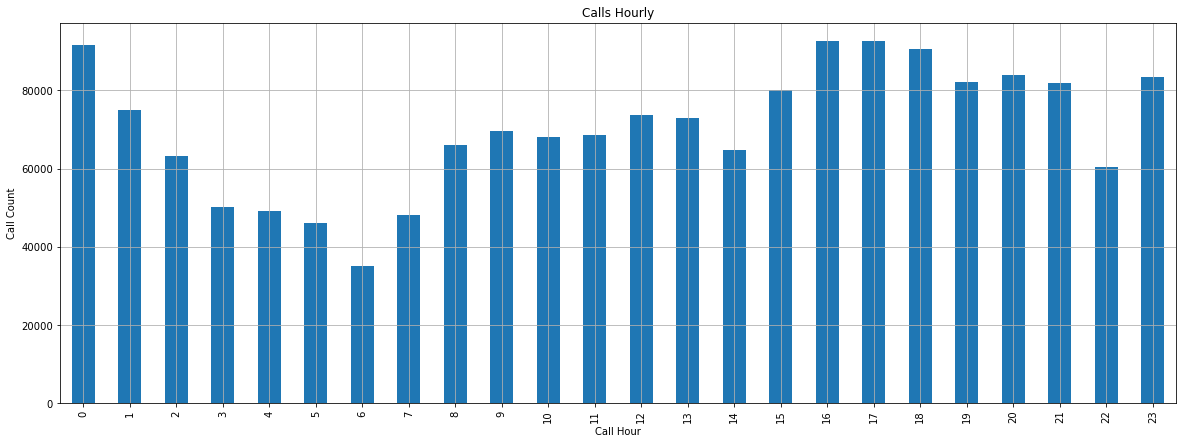

In [36]:
# extracted_crime_data[extracted_crime_data['CrimeDateTime']=="Unknown"]
times = pd.to_datetime(raw_911_df.callDateTime)
calls_hourly_df=raw_911_df.groupby([times.dt.hour]).callDateTime.count();
plt.figure(figsize = (20, 7))
calls_hourly_df.plot.bar(xlabel="Call Hour", ylabel="Call Count", title="Calls Hourly", grid=True)
plt.show()

<h5>Observation</h5>
<li>Call rate is lowest at 6am</li>
<li>As the day progress number of calls to 911 increase</li>
<li>Call rate is at peak at 4pm, 5pm, 6pm and 12am </li>

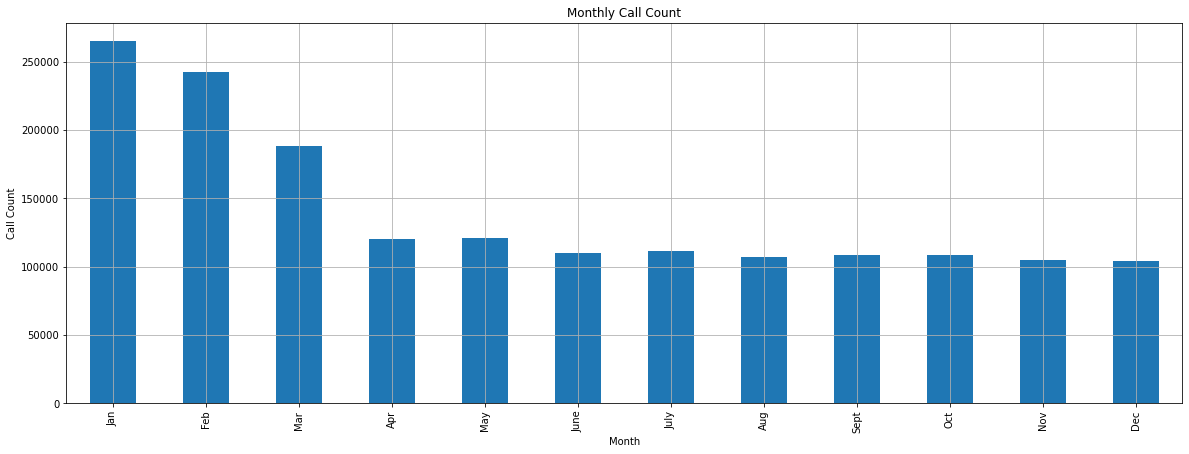

In [37]:
times = pd.to_datetime(raw_911_df.callDateTime)
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
calls_monthly=raw_911_df.groupby([times.dt.month]).callDateTime.count();
plt.figure(figsize = (20, 7))
ax=calls_monthly.plot.bar(xlabel="Month", ylabel="Call Count", title="Monthly Call Count", grid=True)
ax.set_xticklabels(month)
plt.show()

<h5>Observation</h5>
<li>Call rate is highest in 1st three months</li>
<li>The Number of calls in each month of remaining 9 months is less than half first 3 months</li>

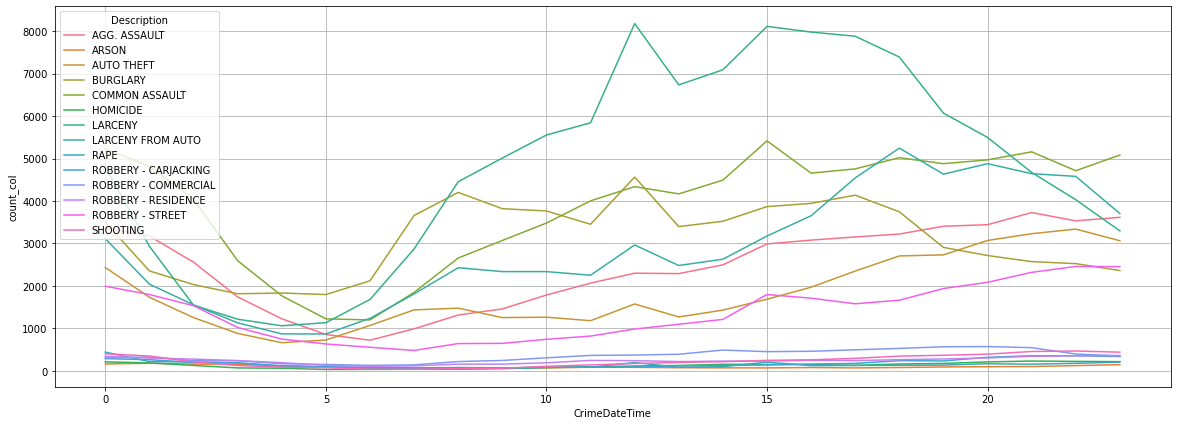

In [38]:
# Graph to check which crimes are happening at what time
times = pd.to_datetime(raw_crime_df.CrimeDateTime)
time=[x for x in range(24)]
crime_hourly_groupby_crimetype = raw_crime_df.groupby([times.dt.hour, "Description"]).agg(
    count_col=pd.NamedAgg(column="Description", aggfunc="count")
)
crime_hourly_groupby_crimetype
plt.figure(figsize = (20, 7))
plt.grid()
g=sns.lineplot(x="CrimeDateTime", y="count_col", hue='Description', data=crime_hourly_groupby_crimetype)

<AxesSubplot:title={'center':'District Wise Call Count'}, xlabel='District', ylabel='Call Count'>

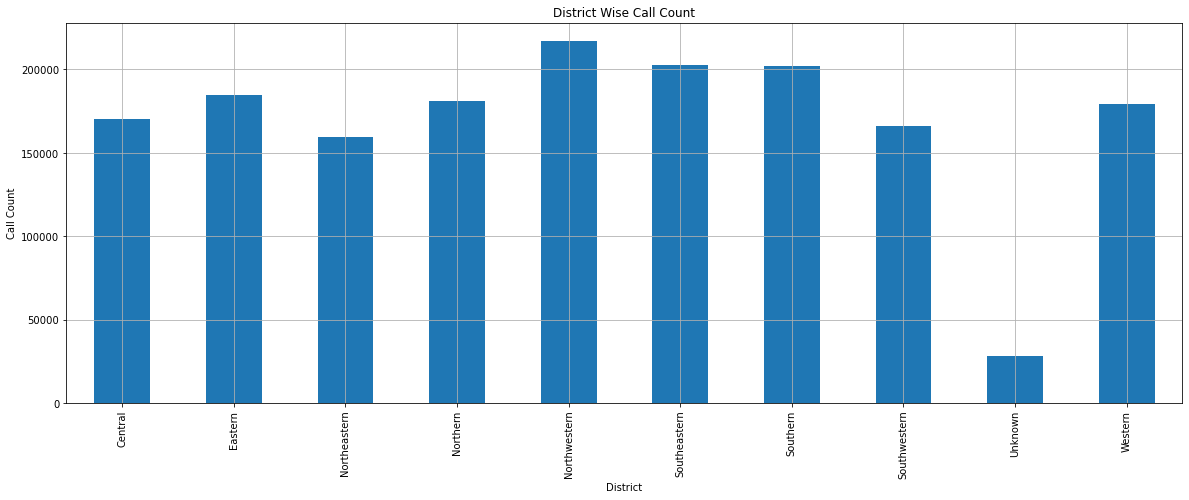

In [39]:
plt.figure(figsize = (20, 7))
raw_911_df.groupby('PoliceDistrict').callDateTime.count().plot.bar(xlabel="District", ylabel="Call Count", title="District Wise Call Count", grid=True)

<h5>Observation</h5>
<li>NorthWestern has highest call rate</li>
<li>Call from unknown values are very few compared to overall data</li>
<li>Souther and SouthernEastern Districts have almost same call rate</li>

<AxesSubplot:title={'center':'Zipcode wise Call Count'}, xlabel='Zipcode', ylabel='Call Count'>

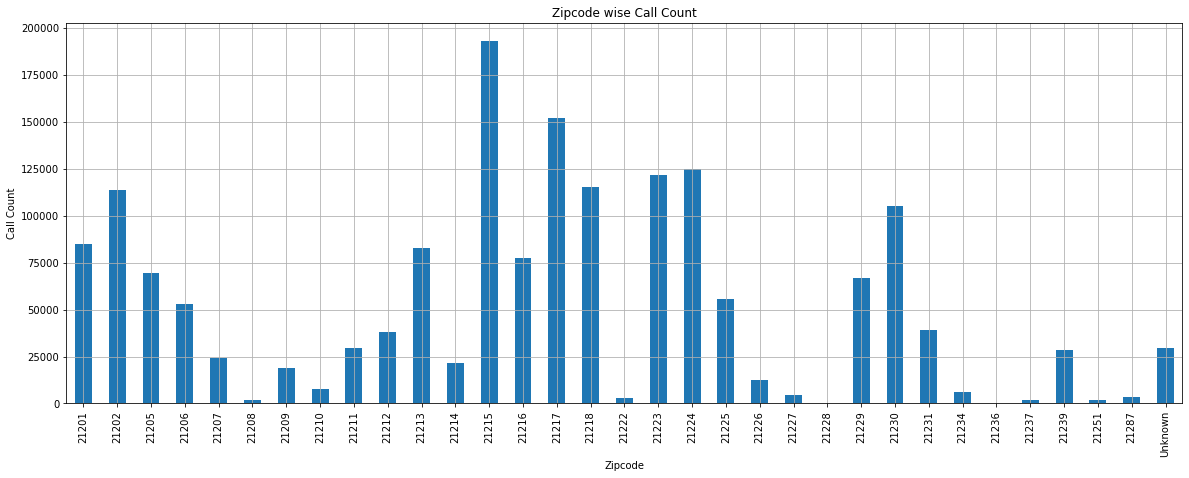

In [40]:
plt.figure(figsize = (20, 7))
raw_911_df.groupby('ZIPCode').callDateTime.count().plot.bar(xlabel="Zipcode", ylabel="Call Count", title="Zipcode wise Call Count", grid=True)

<h5>Observation</h5>
<li>21215 has highest call rate to 911 throughout 2021</li>
<li>21228, 21236 zipcodes calls are almost zero throughout the year 2021</li>

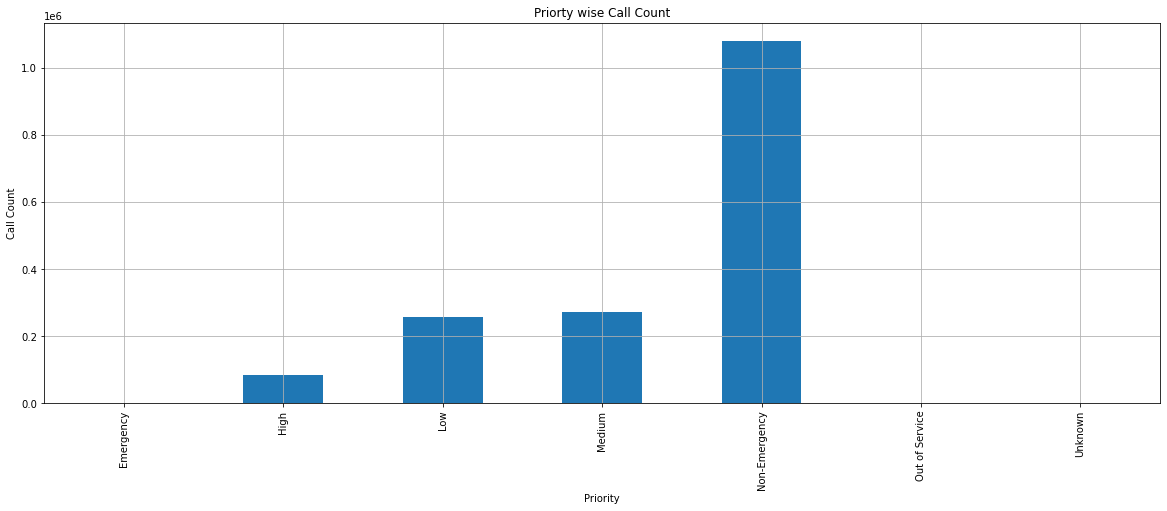

In [41]:
plt.figure(figsize = (20, 7))
priority_df=raw_911_df.groupby('priority').callDateTime.count();
priority_df.plot.bar(xlabel="Priority", ylabel="Call Count", title="Priorty wise Call Count", grid=True);

<h5>Observation</h5>
<li>Non Emergency calls are way to high than emergency calls</li>
<li>Next to non emergency calls Medium and low prioirty calls are high</li>

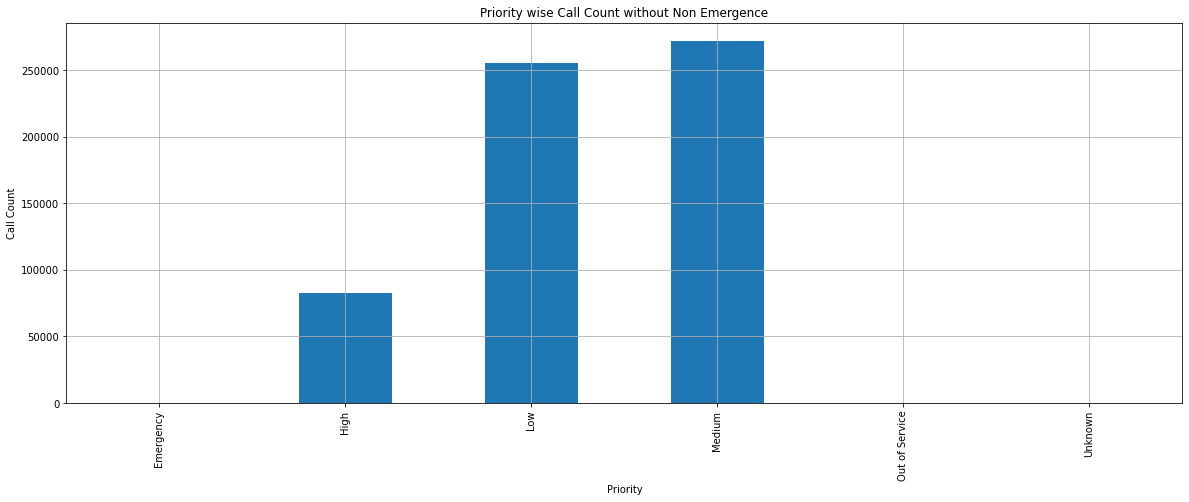

In [42]:
plt.figure(figsize = (20, 7))
raw_911_df[raw_911_df['priority']!='Non-Emergency'].groupby('priority').callDateTime.count().plot.bar(xlabel="Priority", ylabel="Call Count", title="Priority wise Call Count without Non Emergence", grid=True);

<h5>Observation</h5>
<li>After Non Emergency Medium and low priority are the majority of the calls</li>

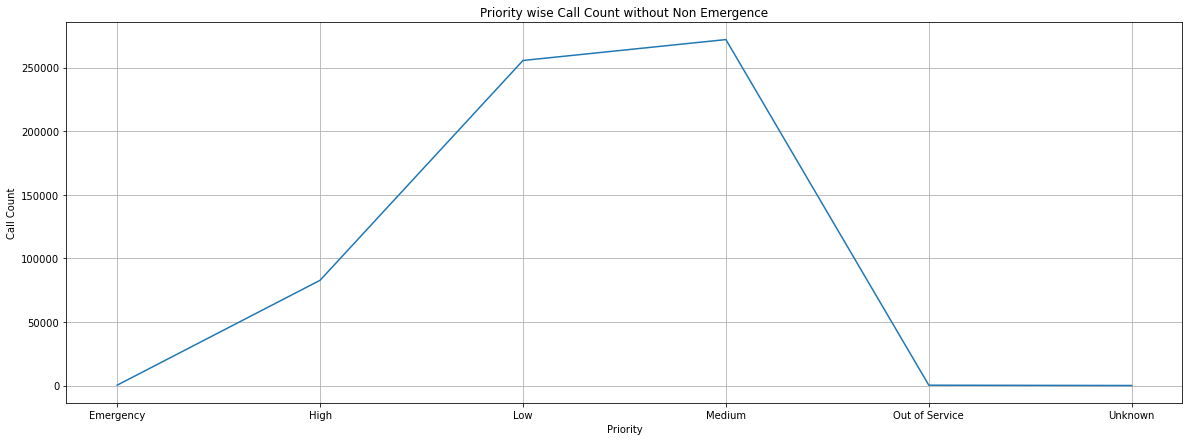

In [43]:
plt.figure(figsize = (20, 7))
raw_911_df[raw_911_df['priority']!='Non-Emergency'].groupby('priority').callDateTime.count().plot(xlabel="Priority", ylabel="Call Count", title="Priority wise Call Count without Non Emergence", grid=True);

<h5>Observation</h5>
<li>Number of emergency calls are negligble when compared with Medium Low and High priority calls</li>
<li>Out ofservice and unknown calls are also very few.</li>

<AxesSubplot:title={'center':'Neighborhood wise Call Count without Non Emergence least 20'}, xlabel='Neighborhood', ylabel='Call Count'>

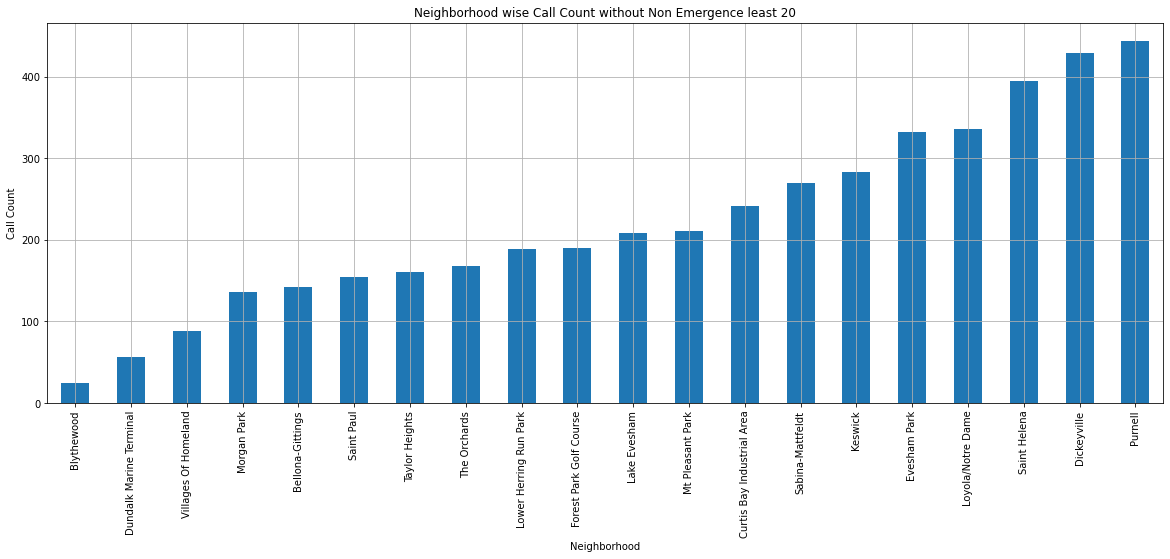

In [44]:
plt.figure(figsize = (20, 7))
raw_911_df.groupby('Neighborhood').callDateTime.count().sort_values().head(20).plot.bar(xlabel="Neighborhood", ylabel="Call Count", title="Neighborhood wise Call Count without Non Emergence least 20", grid=True)

<AxesSubplot:title={'center':'Neighborhood wise Call Count without Non Emergence top 20'}, xlabel='Neighborhood', ylabel='Call Count'>

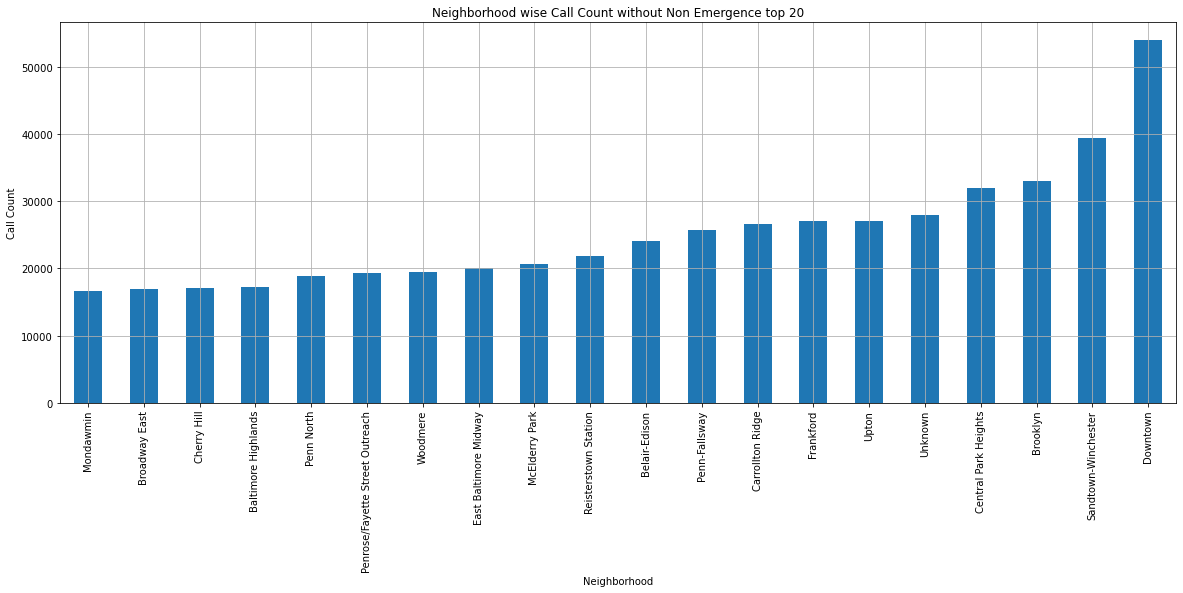

In [45]:
plt.figure(figsize = (20, 7))
raw_911_df.groupby('Neighborhood').callDateTime.count().sort_values().tail(20).plot.bar(xlabel="Neighborhood", ylabel="Call Count", title="Neighborhood wise Call Count without Non Emergence top 20", grid=True)

<h4>DataFrame Merge</h4>

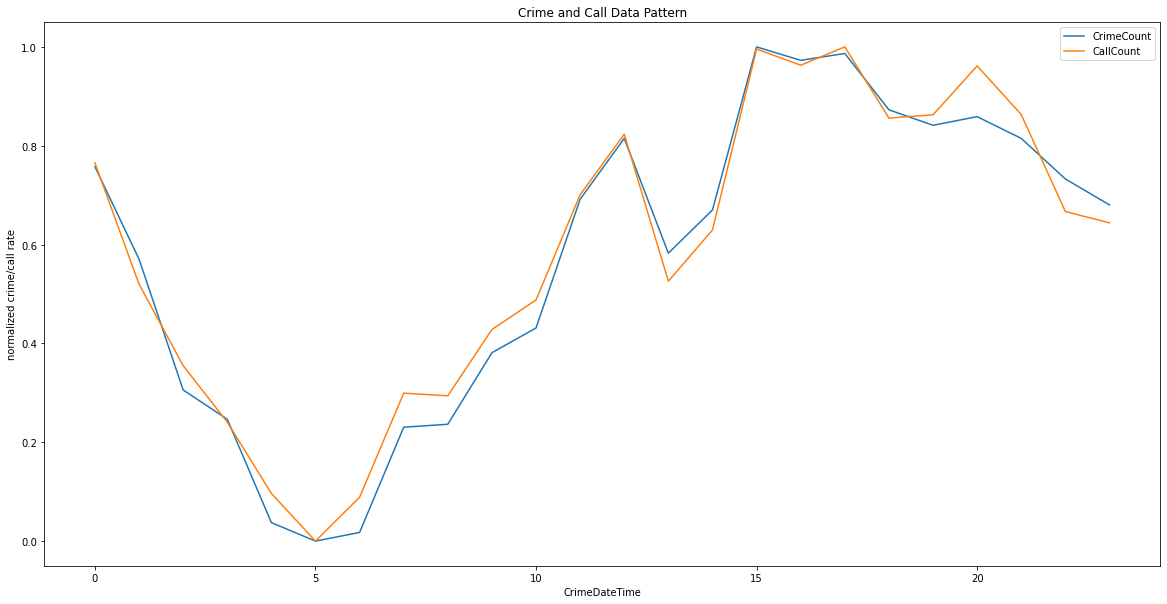

In [46]:
crime_df_2021_count = raw_crime_df.set_index(keys='CrimeDateTime').resample('H').CrimeCode.count()['2021']
calls_df_2021_count = raw_911_df.set_index(keys='callDateTime').resample('H').priority.count()
merged_df_hourly = pd.merge(crime_df_2021_count, calls_df_2021_count, right_index=True, left_index=True).rename(columns={'CrimeCode': 'CrimeCount', 'priority': 'CallCount'}).reset_index();
hourly_sum=merged_df_hourly.groupby([times.dt.hour]).sum()
hourly_norm = (hourly_sum-hourly_sum.min())/(hourly_sum.max()-hourly_sum.min())
# plt.figure(figsize = (20, 7))
hourly_norm.plot(figsize=(20, 10), ylabel="normalized crime/call rate",  title="Crime and Call Data Pattern");

<h5>Observation</h5>
<li>Both the data have perfect correlation</li>
<li>As the crime increase number of calls to 911 will increase. But the inverse cannot be true always.</li>

<h5>TTest</h5>
<li>Null Hypothesis relation between crime rate and call data</li>

In [47]:
crime_count=hourly_sum['CrimeCount']
call_count=hourly_sum['CallCount']
ttest_ind(crime_count, call_count , equal_var=False)

Ttest_indResult(statistic=-14.095961794562504, pvalue=8.220393894739563e-13)

<h5>Observation</h5>
<li>pvalue is less than 0.05</li>
<li>pvalue less than 0.05 indicates that null hypothesis false</li>
<li>therefore the opposite of the null hypothesis is true</li>

<h5>Correlation Check Between Crime and 911 data</h5>

In [48]:
hourly_sum.corr()

,CrimeCount,CallCount
CrimeCount,1.000000,0.990422
CallCount,0.990422,1.000000


<h5>Observation</h5>
<li>Crime and call data has similar pattern</li>
<li>As the number of crimes increase 911 calls also tend to increase</li>

<h3>Data Inconsistencies observed</h3>
<ol>
    <li>Weapon used in most of the crimes in crime data is not known</li>
    <li>Crime data is not recored properly before 2011</li>
    <li>Description in column in the 911 call data has lot of data errors or spelling mistakes</li>
    <li>In Weapons Column Firearm is referred with so many words</li>
    <li>Premise column has lot of trailing space and empty spaces between words</li>
</ol>

<h3>Summary</h3>
<ol>
    <li>Description column is not recorded properly either due to faster response times or many people recording informatin in many different  ways</li>
    <li>911 Call are lowest at 6am and 5am</li>
    <li>911 calls peak at 4pm, 5pm and 12 pm</li>
    <li>Most of the 911 calls are non emergence calls</li>
    <li>Followed by Non Emergence calls Medium and low priority calls are more</li>
    <li>January, February, March has highest number of calls to 911</li>
    <li>Northwestern district has highest number of calls</li>
    <li>Both Crime data and call rate has high correlation</li>
    <li>As the TTest is failed for null hypothesis there is a strong relation between each of them</li>
</ol>

<h3>Things Learnt</h3>
<ol>
    <li>Never trust data</li>
    <li>Finding a good dataset is difficult than doing EDA on a dataset</li>
    <li>1st step to when doing EDA is studying and understanding the structure and type of data</li>
    <li>Domain Knowledge is more important than programming when doing exploratory data anaylysis</li>
    <li>Columns should be converted to appropriate datatyes before using them for Eda</li>
    <li>Even if the data is clean we have verify if the data is really clean</li>
    <li>Data Should be cleaned with appropriate cleaning techniques</li>
    <li>Same cleaning techniques cannot be applied every dataset</li>
    <li>Even after cleaning the data we have verify if the data is clean by doing some sanity checks</li>
</ol>